The main challenge of this datatset is to classify credit card transaction as fraudulent or legitimate. The task is challenging as we need a model that is extremely accurate in order to not inconvenience customers whie also catching scammers. 

Our data will exhibit unfavourable qualities such as a highly lopsided nature due to the vast majority of transaction being legitimate meaning we may undersample this data unless we take steps to sample with less bias.
If we can use good resampling methods we can remedy some of this systematic bias in our dataset. 

With a large amount of data coming in we need a very fast classification model in order to filter all the transactions in a timely manner for clients. Our model needs to be simple so we can run it quickly and efficiently while being highly accurate. 

if a fraudulent transaction goes through it will be misclassified and will affect our models accuracy. We therefore must use data from a highly reputable and trustworhty source in order to not introduce misclassification bias into our model.

As scammers will adjust their methods to overcome our fraud detecting model a simple model will allow us to tweak it 'on the fly' in order to ensure we can quickly our model to deal with changes in a scammers operation. 



In [90]:
#import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [48]:
#Load the data from our csv file and examine its structure 
credit=pd.read_csv("/Users/umar/Documents/datasets/creditcard.csv")
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(credit.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [38]:
#How much of the data is detection of fraud cases
credit_fraud=credit[credit['Class']==1]
credit_legit=credit[credit['Class']==0]
credit_bias=len(credit_fraud)/len(credit_legit)
print(credit_bias)
print('Number of Fraudulent transaction', len(credit_fraud))
print('Number of Legitimate transactions', len(credit_legit))


0.0017304750013189597
Number of Fraudulent transaction 492
Number of Legitimate transactions 284315


Reduce imbalance in the dataset for a more accurate model.

Just 0.17% of cases are fraudeluent indicating that the model is highly biased and we will need powerful resampling methods in order to develop a model that is adept at spotting fruadulent transactions. 

We can using sampling approaches such as SMOTE (Synthetic Minority Over-sampling Technique) to artificially increase the cases of the minority class in our sampling in order to improve the balance of the dataset distribution to improve model accuracy.
K - fold Stratified cross Validation: Ensures a certain percentage of cases from each class to ensure each fold contains elements from the minority class in order to maintains distibutional representation across folds.

In [39]:
#Viewing descriptive aspects to analyse differences in profile between fraudulent and valid transactions. 
fraud_stats=credit_fraud['Amount'].describe()
legit_stats=credit_legit['Amount'].describe()
comparison_table=pd.DataFrame({
    'Fraudulent Transactions': fraud_stats,
    'Legitimate Transactions': legit_stats
})
print(comparison_table.round(2))

       Fraudulent Transactions  Legitimate Transactions
count                   492.00                284315.00
mean                    122.21                    88.29
std                     256.68                   250.11
min                       0.00                     0.00
25%                       1.00                     5.65
50%                       9.25                    22.00
75%                     105.89                    77.05
max                    2125.87                 25691.16


While we can see that the frequency of Legitimate transactions is far higher the average size of a fraudulent transaction is higher implying that this is a serious issue for the clients involved who are losing large sums of money. However, this could also serve as a significant differentiator. 

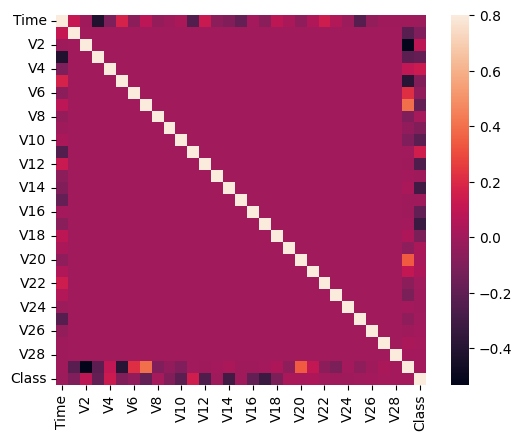

  Feature1 Feature2     Value
0     Time       V3 -0.419618
1       V2   Amount -0.531409


In [67]:
#We will use a correlation Matrix to analyse which features have higher potential to be more impactful in their predictive power
#Features that correlate too strongly suggest we are increasing compute time for higher dimensionality while increasing little in terms of data value. 
# We also have isues with interpretability, feature importance, overfitting on model relatiobships leading to loss of generalisability and more.

#Build a heatmap using the correlation matrix
corr = credit.corr()

# Plot the heatmap
sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

# Extract features with high correlation
high_corr = []
threshold = 0.4

#Select upper triangle to avoid double counting.
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

#Look over each square in upper triangle
for column in upper.columns:
    for row in upper.index:
        corr_value = upper.loc[row, column]
        if abs(corr_value) > threshold:
            high_corr.append((row, column, corr_value))

#Put into dataframe
high_corr_df = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Value'])
print(high_corr_df)



From this heatmap it can be seen that the dataset exhibits a low level of multicollinearity

In [73]:
#We split the dataset into our target and predictor variables.
#Initially we will take a simple train_train split approach to this probkem. 
pred_var=credit.drop(['Class'],axis=1) #axis=1 inidicates column
target_var=credit['Class']
print(pred_var.shape)
print(target_var.shape)

pred_test, pred_train, target_test, target_train = train_test_split(pred_var,target_var, test_size=0.2, random_state=123) #use classic 80/20 split train/test split

(284807, 30)
(284807,)


In [83]:
#We build a random classifier as it is adept at handling high dimensional data with complex features relationships.
#However, Random forest is not as adept with high dimensional datasets as loss function places heavy emphasis on avoiding error meaning in highly imbalanced data it can focus on the majority class. 

#in an attempt to make the data weight more equal we can use
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(pred_train, target_train)
#perform predictions
predictions=rf.predict(pred_test)

Now it is important to evaluate our model performance

In [91]:
#Start our evaluation with a confusion matrix
mat=confusion_matrix(target_test, predictions)
print('Confusion Matrix')
print(mat)

#Print our classification report
print('Classification Report')
print(classification_report(target_test,predictions))

print('Sccuracy Score')
print(accuracy_score(target_test,predictions))

#ROC Area Under Curve score
#As we are dealing with highly imbalanced data the ROC should be considered as the more metrix compared to baseline accuracy
#
prob = rf.predict_proba(pred_test)[:, 1]
roc_auc = roc_auc_score(target_test, prob)
print("ROC Area Under Curve Score:", roc_auc)


Confusion Matrix
[[227439     29]
 [   104    273]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.90      0.72      0.80       377

    accuracy                           1.00    227845
   macro avg       0.95      0.86      0.90    227845
weighted avg       1.00      1.00      1.00    227845

Sccuracy Score
0.9994162698325616
ROC Area Under Curve Score: 0.9385059274842937


Nezt we will try improve our model further by dealing with the imbalance in the dataset.